This notebook is for demonstrating and testing the specgram transformation code, as exported to scikit-learn compatible custom transformers.

## Imports

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from meowlib import utils, data_handling

## Settings

In [3]:
data_dir = '../../data/raw_data/zenodo.4008297'

## Notebook Code

In [4]:
import librosa
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
import tqdm


class SpecgramTransformer(TransformerMixin, BaseEstimator):
    '''This is a copy of the actual code in meowlib.data_handling.
    The only purpose of this copy is to demonstrate the format for the transformer.
    '''

    def fit(self, X, y=None):
        '''The scikit-learn pipeline requires transformers to have a "fit"
        method, but it can be empty.
        '''
        
        return self

    def transform(self, X):

        arrs = []
        for data_fp in tqdm.tqdm(X):
            datalib, ratelib = librosa.load(data_fp, sr=None)
            specgram = librosa.stft(datalib)
            specmag,_ = librosa.magphase(specgram)
            mel_scale_sgram = librosa.feature.melspectrogram(S=specmag,sr=ratelib)
            mel_spec_db = librosa.amplitude_to_db(mel_scale_sgram,ref=np.min)
            arrs.append(mel_spec_db)
            
        return arrs


## Parse Settings

In [5]:
fps = utils.discover_data(data_dir, extension='wav')

## Create Transformer

In [6]:
specgram_transformer = data_handling.SpecgramTransformer()

## Show Results

In [7]:
specgrams = specgram_transformer.fit_transform(fps)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440/440 [00:01<00:00, 255.73it/s]


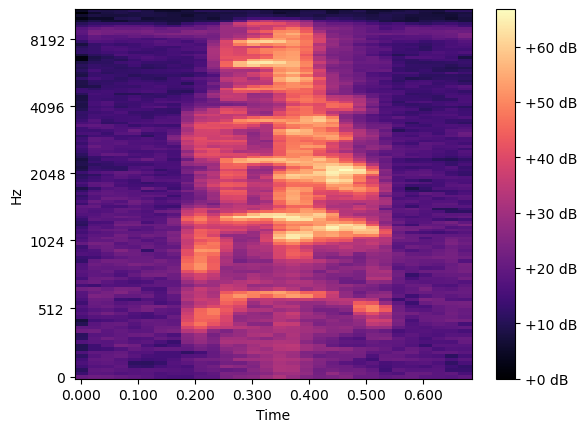

In [10]:
librosa.display.specshow(specgrams[5], x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')